PHASE1

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from datetime import datetime

In [3]:
ph = pd.read_csv("phishing_dataset.csv")
display(ph)

,domain,ranking,isIp,valid,activeDuration,urlLen,is@,isredirect,haveDash,domainLen,nosOfSubdomain,label
0,www.voting-yahoo.com,10000000,0.0,0,0.0,20,0.0,0.0,1.0,20,2,1
1,www.zvon.org/xxl/WSDL1.1/Output/index.html,194914,0.0,1,7305.0,42,0.0,0.0,0.0,12,2,0
2,tecportais.com/file-security-update-infonfmati...,10000000,0.0,0,0.0,155,0.0,0.0,0.0,14,1,1
3,bima.astro.umd.edu/nemo/linuxastro/,7001,0.0,0,0.0,35,0.0,0.0,0.0,18,3,0
4,huarui-tec.com/js/?us.battle.net/login/en/?ref...,10000000,0.0,1,730.0,79,NaN,0.0,1.0,14,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
95905,www.freewebs.com/ryanrules2/,5001,0.0,1,8035.0,28,0.0,0.0,0.0,16,2,0
95906,www.ireland-information.com/freecelticfonts.htm,230251,0.0,1,8400.0,47,0.0,0.0,1.0,27,2,0
95907,www.clubtaunus.soroptimist.de/img/pro/e.php,10000000,0.0,0,0.0,43,NaN,0.0,0.0,29,3,1
95908,www.askmen.com/sports/business/index.html,2008,0.0,1,9862.0,41,0.0,0.0,0.0,14,2,0


*About Dataset*

Domain: The URL itself.
Ranking: Page Ranking
isIp: Is there an IP address in the weblink
valid: This data is fetched from google's whois API that tells us more about the current
status of the URL's registration.
activeDuration: Also from whois API. Gives the duration of the time since the
registration up until now.
urlLen: It is simply the length of the URL
is@: If the link has a '@' character then it's value = 1
isredirect: If the link has double dashes, there is a chance that it is a redirect. 1-> multiple
dashes present together.
haveDash: If there are any dashes in the domain name.
domainLen: The length of just the domain name.
noOfSubdomain: The number of subdomains preset in the URL.
Labels: 0 -> Legitimate website , 1 -> Phishing Link/ Spam Link

In [5]:
ph.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95910 entries, 0 to 95909
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   domain          95910 non-null  object 
 1   ranking         95910 non-null  int64  
 2   isIp            86319 non-null  float64
 3   valid           95910 non-null  int64  
 4   activeDuration  92074 non-null  float64
 5   urlLen          95910 non-null  int64  
 6   is@             81524 non-null  float64
 7   isredirect      91115 non-null  float64
 8   haveDash        91115 non-null  float64
 9   domainLen       95910 non-null  int64  
 10  nosOfSubdomain  95910 non-null  int64  
 11  label           95910 non-null  int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 8.8+ MB


In [6]:
ph.dtypes

domain             object
ranking             int64
isIp              float64
valid               int64
activeDuration    float64
urlLen              int64
is@               float64
isredirect        float64
haveDash          float64
domainLen           int64
nosOfSubdomain      int64
label               int64
dtype: object

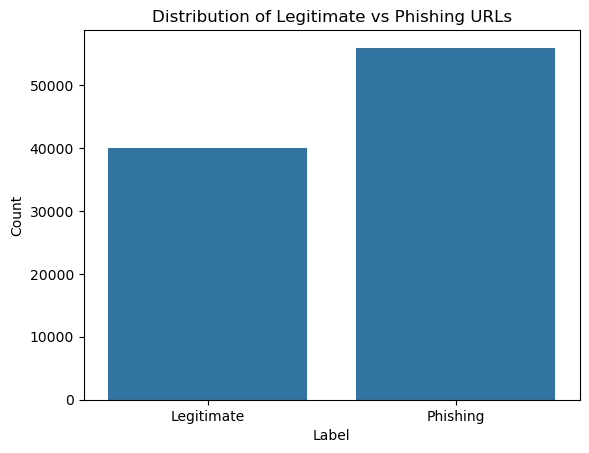

In [7]:
sns.countplot(data=ph, x='label')
plt.title("Distribution of Legitimate vs Phishing URLs")
plt.xticks([0, 1], ['Legitimate', 'Phishing'])
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

This imbalance biases models toward the majority class, which hurts phishing detection performance.

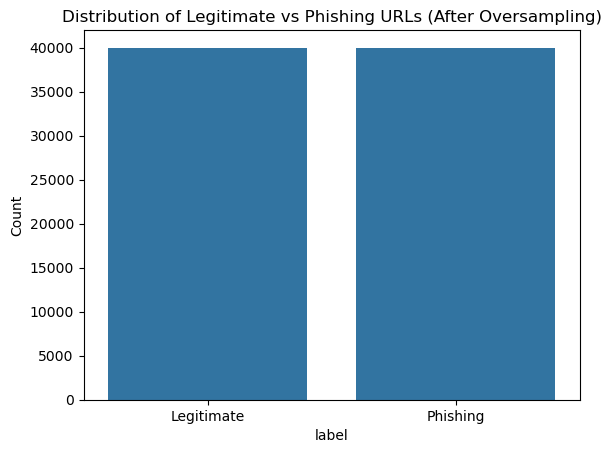

In [9]:
from sklearn.utils import resample

# Separate the majority and minority classes
df_majority = ph[ph['label'] == 0]  # Legitimate URLs
df_minority = ph[ph['label'] == 1]  # Phishing URLs

# Oversample the minority class to match the majority class
df_minority_upsampled = resample(
    df_minority,
    replace=True,
    n_samples=len(df_majority),
    random_state=42
)

df_upsampled = pd.concat([df_majority, df_minority_upsampled])

df_upsampled = df_upsampled.sample(frac=1, random_state=42).reset_index(drop=True)

sns.countplot(data=df_upsampled, x='label')
plt.title("Distribution of Legitimate vs Phishing URLs (After Oversampling)")
plt.xticks([0, 1], ['Legitimate', 'Phishing'])
plt.xlabel("label")
plt.ylabel("Count")
plt.show()

In [10]:
ph.drop('domain', axis=1, inplace=True)

In [11]:
ph.isnull().sum()

ranking               0
isIp               9591
valid                 0
activeDuration     3836
urlLen                0
is@               14386
isredirect         4795
haveDash           4795
domainLen             0
nosOfSubdomain        0
label                 0
dtype: int64

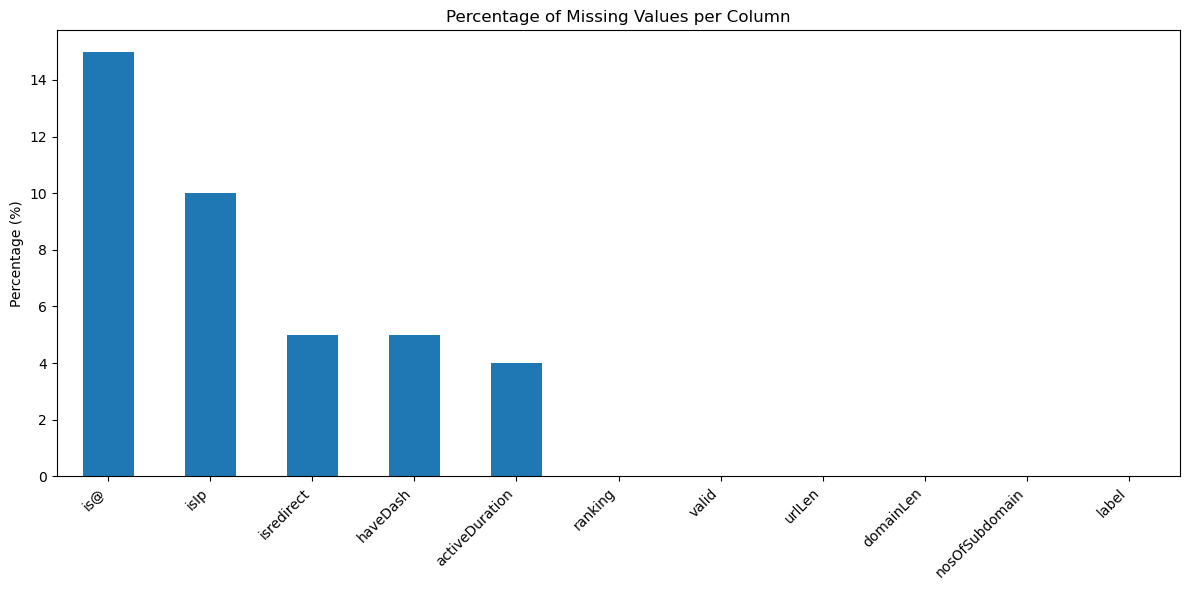

In [12]:
#visualise missing values 
missing_percentage = ph.isnull().mean() * 100
missing_percentage.sort_values(ascending=False).plot(
    kind='bar',
    figsize=(12, 6),
    title='Percentage of Missing Values per Column',
    ylabel='Percentage (%)'
)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [13]:
ph['activeDuration'].describe()

count    92074.000000
mean      3744.957089
std       3973.996391
min          0.000000
25%          0.000000
50%       2192.000000
75%       7670.000000
max      15707.000000
Name: activeDuration, dtype: float64

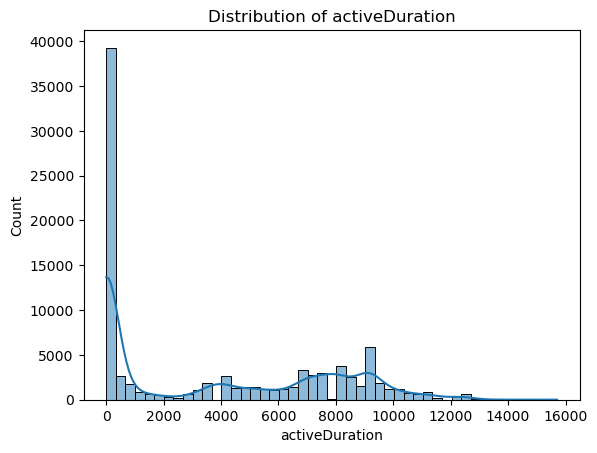

In [14]:
sns.histplot(ph['activeDuration'].dropna(), kde=True)
plt.title("Distribution of activeDuration")
plt.show()


In [15]:
ph['activeDuration'].fillna(ph['activeDuration'].median(), inplace=True)


C:\Users\lalit\AppData\Local\Temp\ipykernel_12536\3024381244.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ph['activeDuration'].fillna(ph['activeDuration'].median(), inplace=True)


In [16]:
counts = ph['is@'].value_counts()
print(counts)

is@
0.0    81289
1.0      235
Name: count, dtype: int64


In [17]:
ph.dropna(subset=['is@'], inplace=True)

In [18]:
ph.isnull().sum()

ranking           0
isIp              0
valid             0
activeDuration    0
urlLen            0
is@               0
isredirect        0
haveDash          0
domainLen         0
nosOfSubdomain    0
label             0
dtype: int64

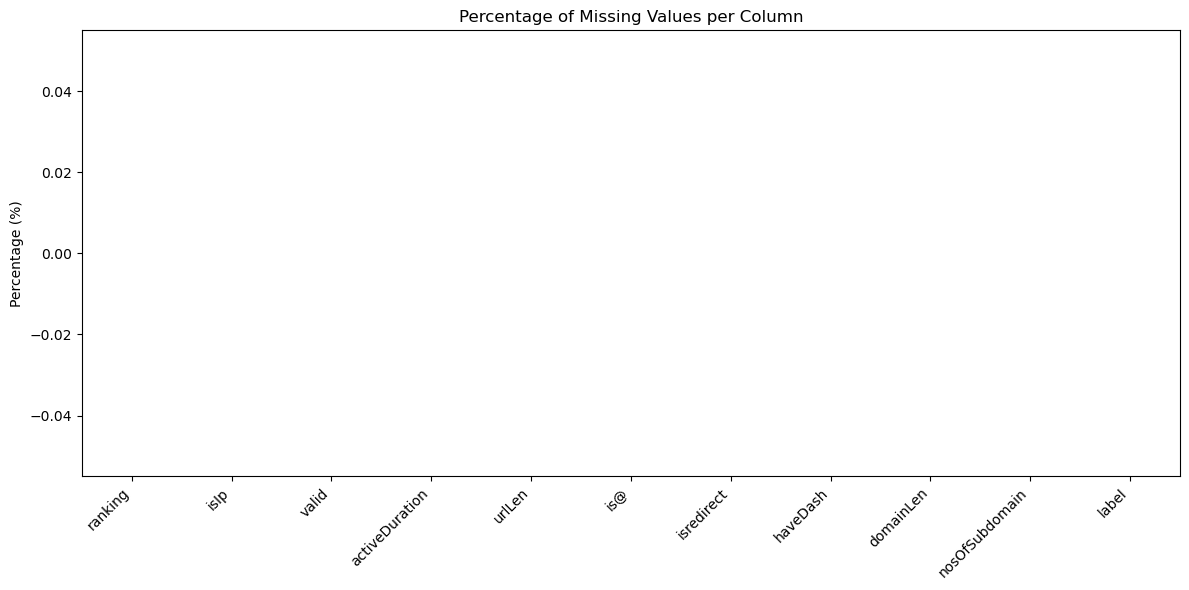

In [19]:
#visualise missing values (AFTER HANDLING)
missing_percentage = ph.isnull().mean() * 100
missing_percentage.sort_values(ascending=False).plot(
    kind='bar',
    figsize=(12, 6),
    title='Percentage of Missing Values per Column',
    ylabel='Percentage (%)'
)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

VISUALISATIONS

C:\Users\lalit\AppData\Local\Temp\ipykernel_12536\2060256622.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ph, x='label', y='activeDuration', estimator='mean', palette='pastel')


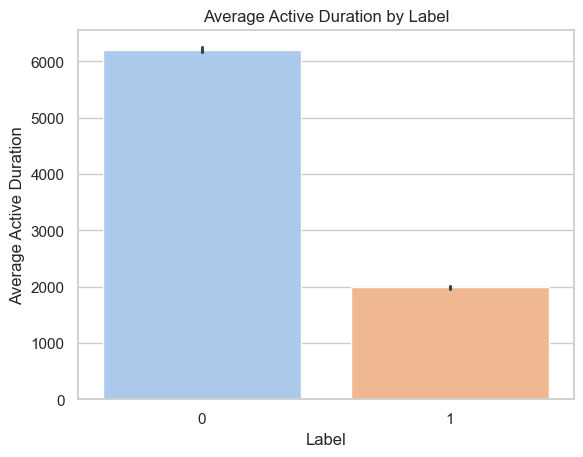

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style
sns.set(style='whitegrid')

# Create bar plot of average activeDuration by label
sns.barplot(data=ph, x='label', y='activeDuration', estimator='mean', palette='pastel')

# Set plot titles and labels
plt.title('Average Active Duration by Label')
plt.xlabel('Label')
plt.ylabel('Average Active Duration')
plt.show()


This plot shows that label 0 has a much higher average active duration than label 1, suggesting a strong behavioral difference between the groups. It's useful for spotting patterns and selecting features for predictive modeling.

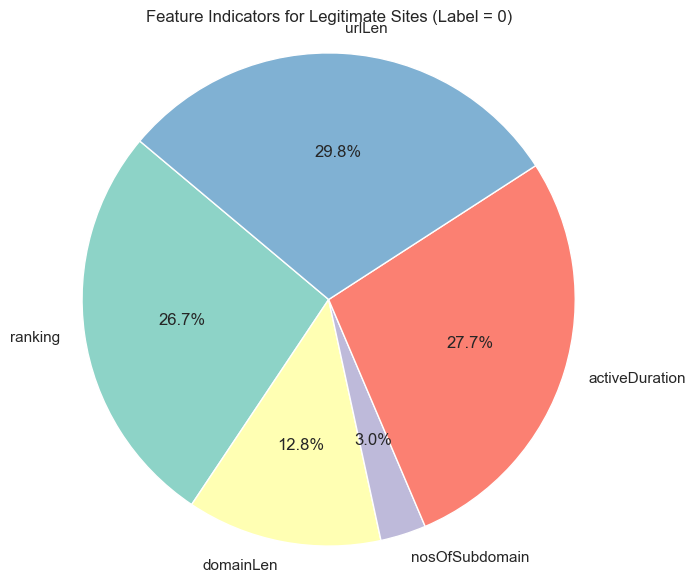

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter for legitimate sites
legit = ph[ph['label'] == 0]

# Compute medians
medians = ph.median(numeric_only=True)

# Define conditions
indicators = {
    'ranking': legit['ranking'] < medians['ranking'],
    'domainLen': legit['domainLen'] > medians['domainLen'],
    'nosOfSubdomain': legit['nosOfSubdomain'] < medians['nosOfSubdomain'],
    'activeDuration': legit['activeDuration'] > medians['activeDuration'],
    'urlLen': legit['urlLen'] < medians['urlLen'],
}

# Count how many legitimate sites meet each condition
indicator_counts = {feature: cond.sum() for feature, cond in indicators.items()}

# Convert to Series for plotting
indicator_series = pd.Series(indicator_counts)

# Plot pie chart
plt.figure(figsize=(7, 7))
plt.pie(indicator_series, labels=indicator_series.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)
plt.title('Feature Indicators for Legitimate Sites (Label = 0)')
plt.axis('equal')
plt.show()


This pie chart highlights the most influential features for identifying legitimate websites. URL length, active duration, and ranking are the top indicators, which can guide model development.

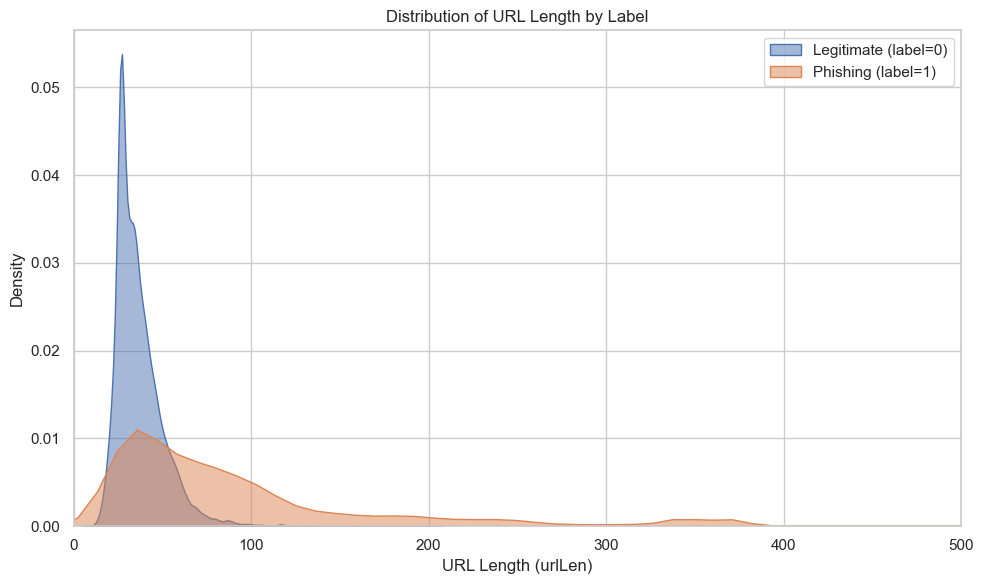

In [25]:
# Set plot style
sns.set(style="whitegrid")

# KDE Plot of urlLen grouped by label
plt.figure(figsize=(10, 6))
sns.kdeplot(data=ph[ph['label'] == 0], x='urlLen', label='Legitimate (label=0)', fill=True, alpha=0.5)
sns.kdeplot(data=ph[ph['label'] == 1], x='urlLen', label='Phishing (label=1)', fill=True, alpha=0.5)

plt.title("Distribution of URL Length by Label")
plt.xlabel("URL Length (urlLen)")
plt.ylabel("Density")
plt.legend()
# Set x-axis from 0 to 500
plt.xlim(0, 500)
plt.tight_layout()
plt.show()

inference: Short URLs are more common among legitimate sites.
Longer URLs are more typical of phishing URLs, possibly because attackers use longer URLs to hide malicious targets or obfuscate their links.

In [27]:
#let us consider a threshold URL LENGTH above which the url is considered long and below it short:
mean_value = ph['urlLen'].mean()
print("Threshold value:", mean_value)

Threshold value: 69.3484863353123


In [28]:
# Map values: above mean -> 1, below or equal to mean -> 0
ph['urlLen'] = ph['urlLen'].apply(lambda x: 1 if x > mean_value else 0)

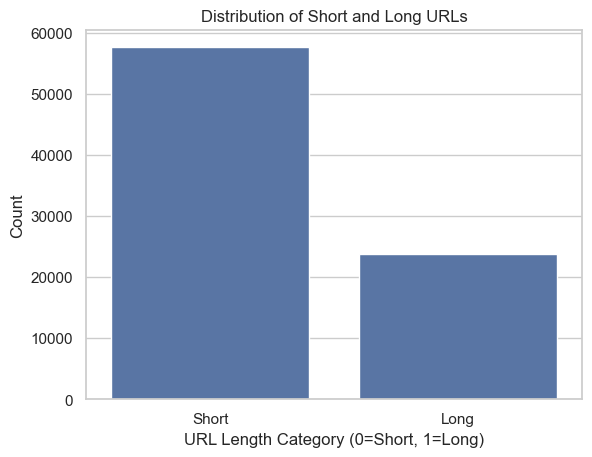

In [29]:
# Count the number of URLs classified as long (1) and short (0)
counts = ph['urlLen'].value_counts().sort_index()

# Plot
sns.barplot(x=counts.index, y=counts.values)
plt.xlabel('URL Length Category (0=Short, 1=Long)')
plt.ylabel('Count')
plt.title('Distribution of Short and Long URLs')
plt.xticks([0, 1], ['Short', 'Long'])
plt.show()

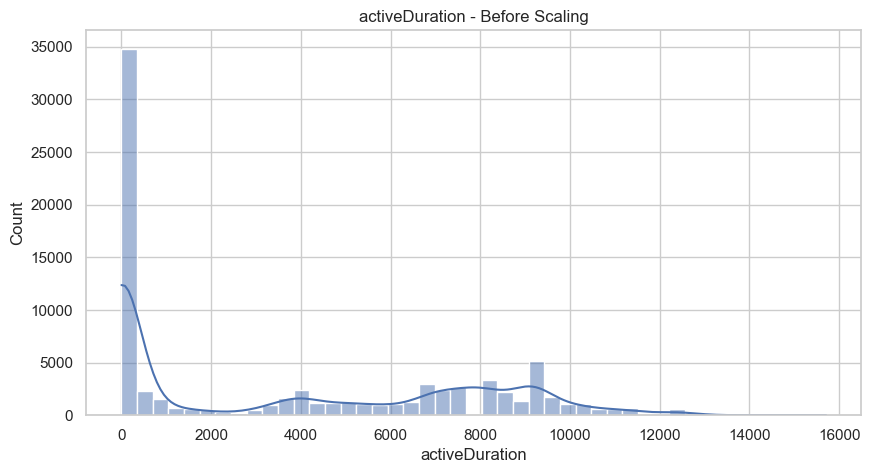

In [30]:
#Visualize Before Scaling
plt.figure(figsize=(10, 5))
sns.histplot(ph['activeDuration'], kde=True)
plt.title('activeDuration - Before Scaling')
plt.show()

In [31]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Columns to scale
normalize_cols = ['activeDuration']

# Normalize
scaler_norm = MinMaxScaler()
ph[normalize_cols] = scaler_norm.fit_transform(ph[normalize_cols])

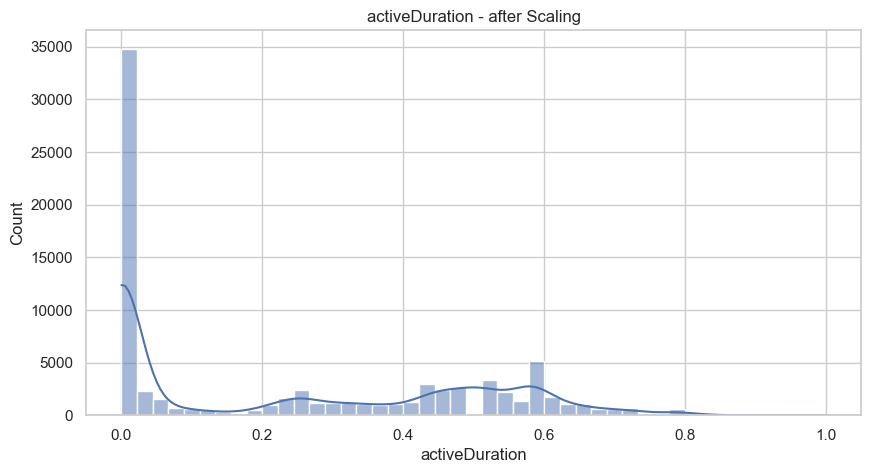

In [32]:
#Visualize After Scaling
plt.figure(figsize=(10, 5))
sns.histplot(ph['activeDuration'], kde=True)
plt.title('activeDuration - after Scaling')
plt.show()

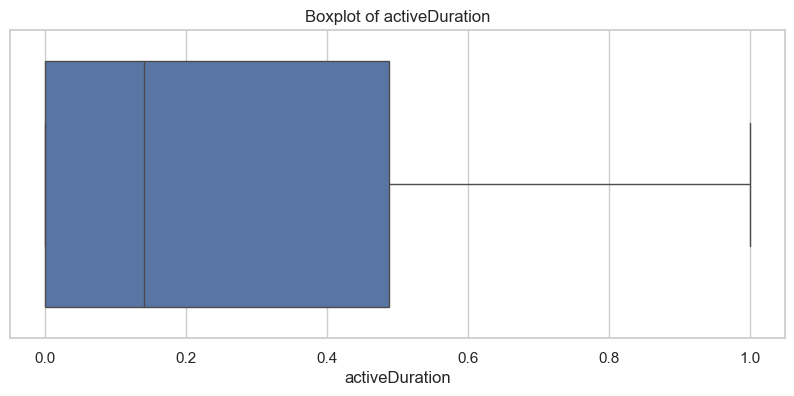

In [33]:
#boxplot to check outliers
plt.figure(figsize=(10, 4))
sns.boxplot(x=ph['activeDuration'])
plt.title('Boxplot of activeDuration')
plt.show()


Overall, this boxplot shows that most activeDuration values are clustered around the median, with a fair amount of variation, and no apparent extreme outliers.

In [35]:
ph['domainLen'].describe()

count    81524.000000
mean        23.401955
std         25.434802
min          3.000000
25%         14.000000
50%         17.000000
75%         22.000000
max        244.000000
Name: domainLen, dtype: float64

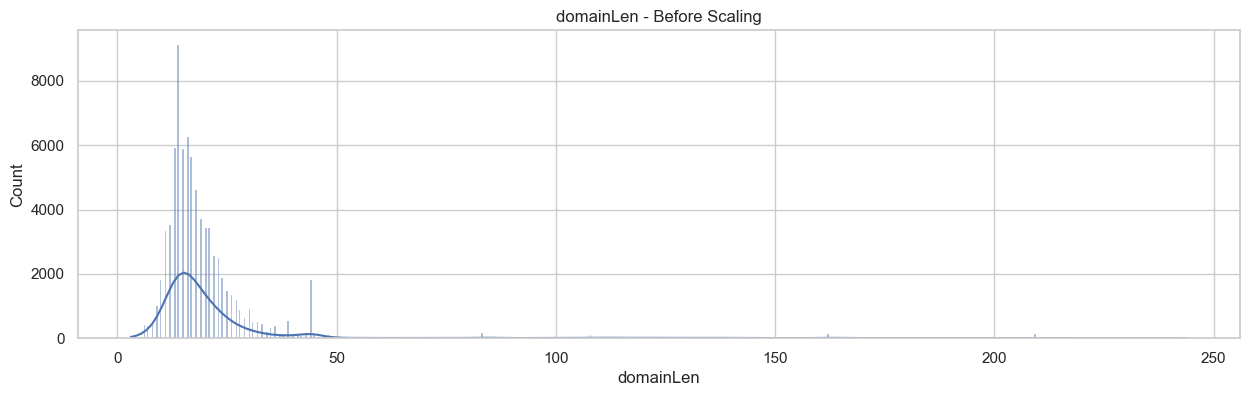

In [36]:
#Visualize Before Scaling
plt.figure(figsize=(15, 4))
sns.histplot(ph['domainLen'], kde=True)
plt.title('domainLen - Before Scaling')
plt.show()

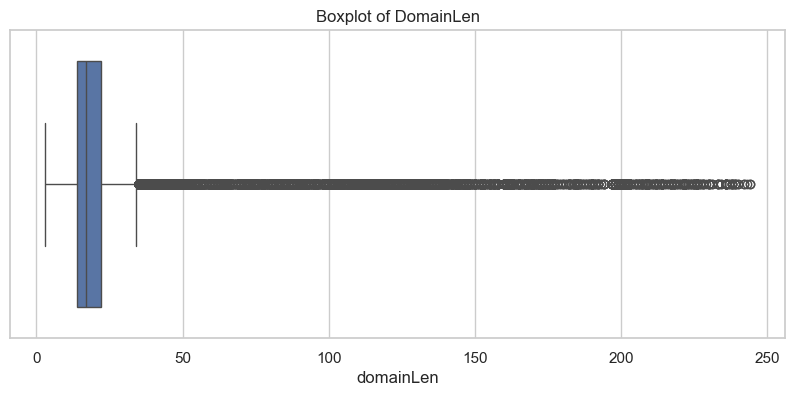

In [37]:
#boxplot to check outliers
plt.figure(figsize=(10, 4))
sns.boxplot(x=ph['domainLen'])
plt.title('Boxplot of DomainLen')
plt.show()


In [38]:
# Calculate percentiles and IQR
Q1 = ph['domainLen'].quantile(0.25)
Q2 = ph['domainLen'].quantile(0.50)  # Median
Q3 = ph['domainLen'].quantile(0.75)
IQR = Q3 - Q1

print(f"Q1 (25th percentile): {Q1}")
print(f"Q2 (50th percentile / Median): {Q2}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR (Q3 - Q1): {IQR}")

# Outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

# count of outliers
outliers = ph[(ph['domainLen'] < lower_bound) | (ph['domainLen'] > upper_bound)]
print(f"Number of outliers: {len(outliers)}")

Q1 (25th percentile): 14.0
Q2 (50th percentile / Median): 17.0
Q3 (75th percentile): 22.0
IQR (Q3 - Q1): 8.0
Lower Bound: 2.0
Upper Bound: 34.0
Number of outliers: 7655


In [39]:
#Cap values at the upper bound (34.0) to preserve data
ph['domainLen_capped'] = np.where(ph['domainLen'] > 34, 34, ph['domainLen'])


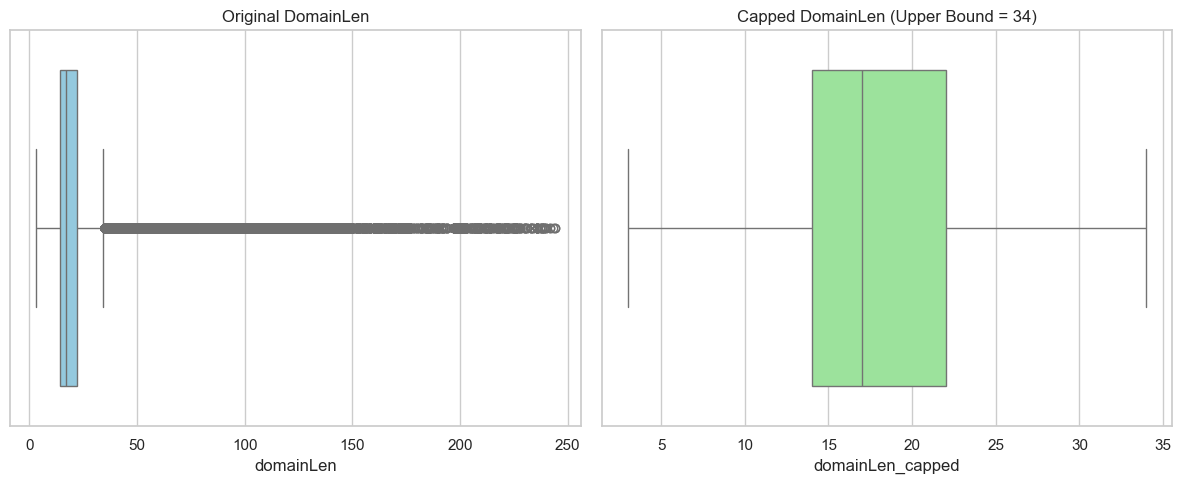

In [40]:
# Side-by-side boxplots
plt.figure(figsize=(12, 5))

# Original
plt.subplot(1, 2, 1)
sns.boxplot(x=ph['domainLen'], color='skyblue')
plt.title('Original DomainLen')

# Capped
plt.subplot(1, 2, 2)
sns.boxplot(x=ph['domainLen_capped'], color='lightgreen')
plt.title('Capped DomainLen (Upper Bound = 34)')

plt.tight_layout()
plt.show()

In [41]:
import numpy as np

# Apply square root transformation
ph['domainLen_sqrt'] = np.sqrt(ph['domainLen_capped'])

In [42]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
ph['domainLen_scaled'] = scaler.fit_transform(ph[['domainLen_sqrt']])

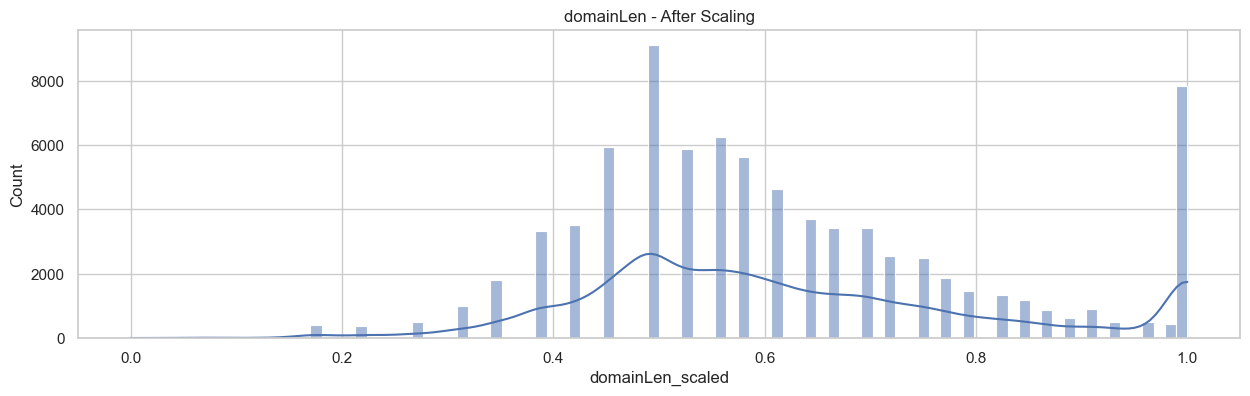

In [43]:
#Visualize After Scaling
plt.figure(figsize=(15, 4))
sns.histplot(ph['domainLen_scaled'], kde=True)
plt.title('domainLen - After Scaling')
plt.show()

In [44]:
ph['ranking'].describe()

count    8.152400e+04
mean     6.124370e+06
std      4.834097e+06
min      1.000000e+00
25%      3.217400e+04
50%      1.000000e+07
75%      1.000000e+07
max      1.000000e+07
Name: ranking, dtype: float64

In [45]:
#Log Transformation 
import numpy as np
ph['ranking_log'] = np.log1p(ph['ranking']) 


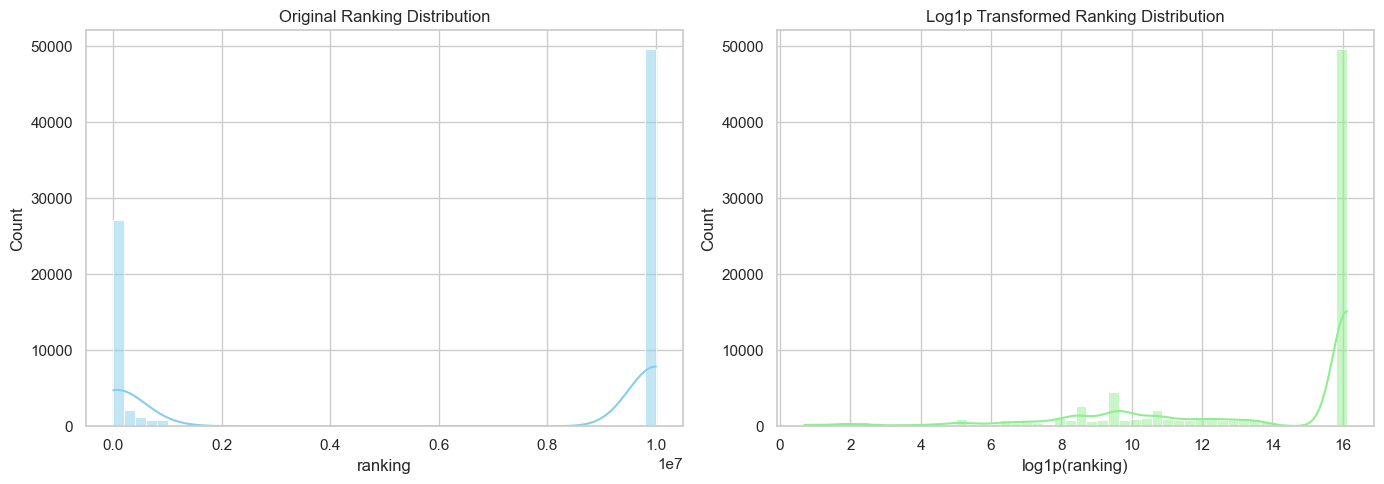

In [46]:
# Plot
plt.figure(figsize=(14, 5))

# Original distribution
plt.subplot(1, 2, 1)
sns.histplot(ph['ranking'], bins=50, kde=True, color='skyblue')
plt.title('Original Ranking Distribution')
plt.xlabel('ranking')

# Log-transformed distribution
plt.subplot(1, 2, 2)
sns.histplot(ph['ranking_log'], bins=50, kde=True, color='lightgreen')
plt.title('Log1p Transformed Ranking Distribution')
plt.xlabel('log1p(ranking)')

plt.tight_layout()
plt.show()

In [47]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
ph['ranking_scaled'] = scaler.fit_transform(ph[['ranking_log']])



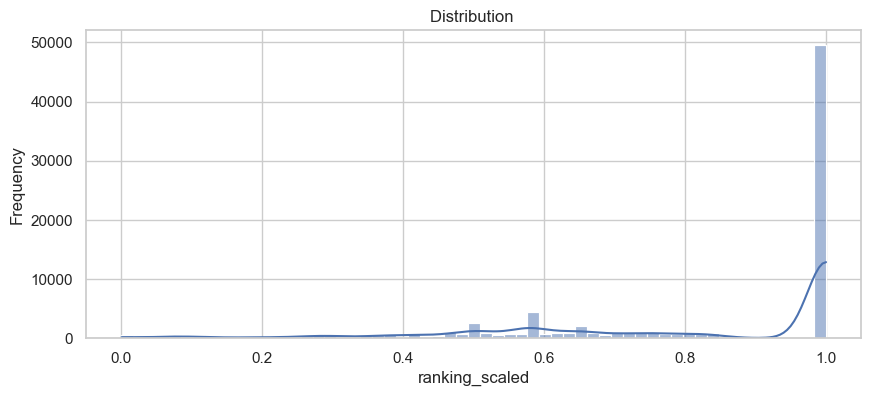

In [48]:
# Plotting Histogram
plt.figure(figsize=(10, 4))
sns.histplot(ph['ranking_scaled'], kde=True)
plt.title('Distribution ')
plt.xlabel('ranking_scaled')
plt.ylabel('Frequency')
plt.show()

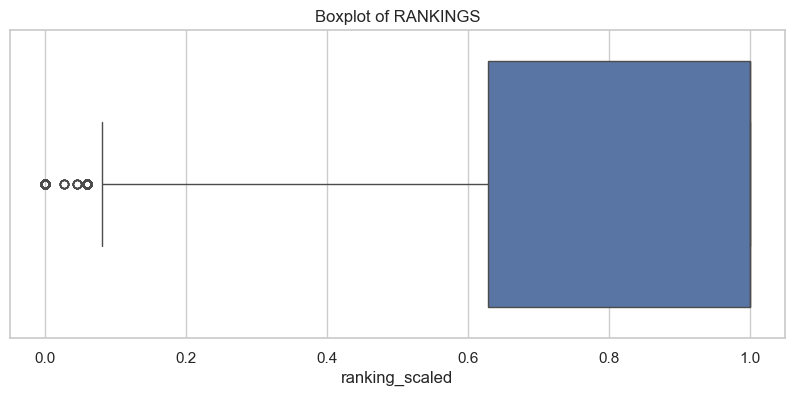

In [49]:
#boxplot to check outliers
plt.figure(figsize=(10, 4))
sns.boxplot(x=ph['ranking_scaled'])
plt.title('Boxplot of RANKINGS')
plt.show()

In [50]:
# Calculate percentiles and IQR
Q1 = ph['ranking_scaled'].quantile(0.25)
Q2 = ph['ranking_scaled'].quantile(0.50)  # Median
Q3 = ph['ranking_scaled'].quantile(0.75)
IQR = Q3 - Q1

print(f"Q1 (25th percentile): {Q1}")
print(f"Q2 (50th percentile / Median): {Q2}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR (Q3 - Q1): {IQR}")

# Outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

# count of outliers
outliers = ph[(ph['ranking_scaled'] < lower_bound) | (ph['ranking_scaled'] > upper_bound)]
print(f"Number of outliers: {len(outliers)}")

Q1 (25th percentile): 0.6279306415641576
Q2 (50th percentile / Median): 1.0
Q3 (75th percentile): 1.0
IQR (Q3 - Q1): 0.37206935843584243
Lower Bound: 0.06982660391039397
Upper Bound: 1.5581040376537636
Number of outliers: 931


In [51]:
ph['ranking_scaled'] = ph['ranking_scaled'].apply(lambda x: max(x, 0.070))


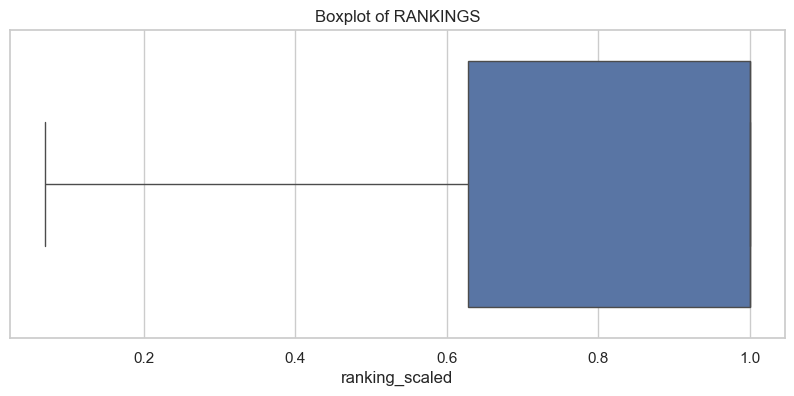

In [52]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=ph['ranking_scaled'])
plt.title('Boxplot of RANKINGS')
plt.show()

In [53]:
display(ph)

,ranking,isIp,valid,activeDuration,urlLen,is@,isredirect,haveDash,domainLen,nosOfSubdomain,label,domainLen_capped,domainLen_sqrt,domainLen_scaled,ranking_log,ranking_scaled
0,10000000,0.0,0,0.000000,0,0.0,0.0,1.0,20,2,1,20,4.472136,0.668493,16.118096,1.000000
1,194914,0.0,1,0.465079,0,0.0,0.0,0.0,12,2,0,12,3.464102,0.422565,12.180319,0.744714
2,10000000,0.0,0,0.000000,1,0.0,0.0,0.0,14,1,1,14,3.741657,0.490279,16.118096,1.000000
3,7001,0.0,0,0.000000,0,0.0,0.0,0.0,18,3,0,18,4.242641,0.612503,8.853951,0.529065
5,10000000,0.0,1,0.069778,0,0.0,0.0,0.0,17,1,1,17,4.123106,0.583340,16.118096,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95904,10000000,0.0,0,0.000000,0,0.0,0.0,0.0,14,1,1,14,3.741657,0.490279,16.118096,1.000000
95905,5001,0.0,1,0.511555,0,0.0,0.0,0.0,16,2,0,16,4.000000,0.553307,8.517593,0.507259
95906,230251,0.0,1,0.534793,0,0.0,0.0,1.0,27,2,0,27,5.196152,0.845129,12.346930,0.755515
95908,2008,0.0,1,0.627873,0,0.0,0.0,0.0,14,2,0,14,3.741657,0.490279,7.605392,0.448121


In [54]:
ph['nosOfSubdomain'].unique()


array([ 2,  1,  3,  5,  7, 10,  6, 11, 12, 13,  4, 14,  8,  9, 21, 16, 18,
       24, 15, 23, 17, 20, 19,  0, 22, 34, 26, 27], dtype=int64)

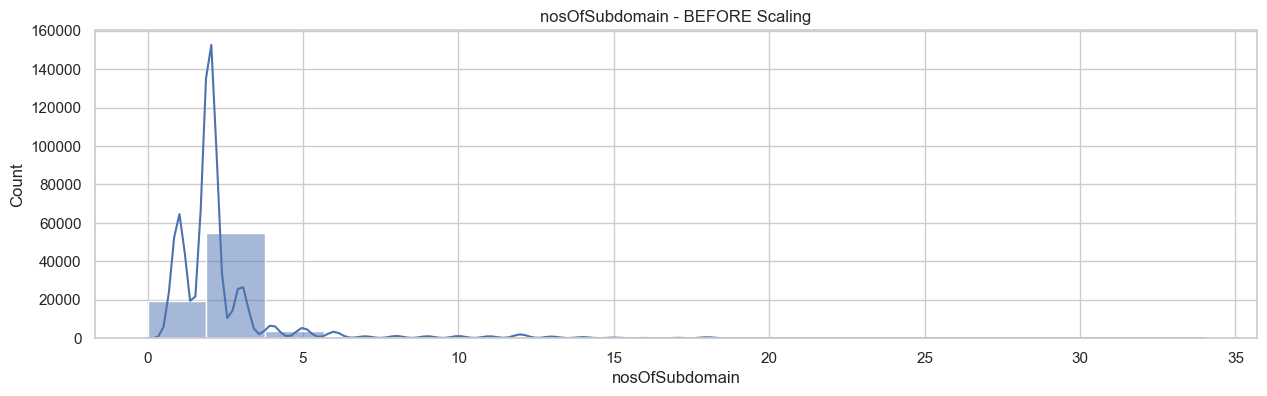

In [55]:
#Visualize BEFORE Scaling
plt.figure(figsize=(15, 4))
sns.histplot(ph['nosOfSubdomain'], kde=True)
plt.title('nosOfSubdomain - BEFORE Scaling')
plt.show()

In [56]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
ph['nosOfSubdomain'] = scaler.fit_transform(ph[['nosOfSubdomain']])

In [57]:
display(ph.head(25))

,ranking,isIp,valid,activeDuration,urlLen,is@,isredirect,haveDash,domainLen,nosOfSubdomain,label,domainLen_capped,domainLen_sqrt,domainLen_scaled,ranking_log,ranking_scaled
0,10000000,0.0,0,0.000000,0,0.0,0.0,1.0,20,0.058824,1,20,4.472136,0.668493,16.118096,1.000000
1,194914,0.0,1,0.465079,0,0.0,0.0,0.0,12,0.058824,0,12,3.464102,0.422565,12.180319,0.744714
2,10000000,0.0,0,0.000000,1,0.0,0.0,0.0,14,0.029412,1,14,3.741657,0.490279,16.118096,1.000000
3,7001,0.0,0,0.000000,0,0.0,0.0,0.0,18,0.088235,0,18,4.242641,0.612503,8.853951,0.529065
5,10000000,0.0,1,0.069778,0,0.0,0.0,0.0,17,0.029412,1,17,4.123106,0.583340,16.118096,1.000000
6,10000000,0.0,1,0.767365,0,0.0,0.0,0.0,19,0.058824,0,19,4.358899,0.640866,16.118096,1.000000
7,23191,0.0,0,0.000000,0,0.0,0.0,0.0,20,0.088235,0,20,4.472136,0.668493,10.051563,0.606706
8,10000000,0.0,0,0.000000,0,0.0,0.0,0.0,15,0.088235,0,15,3.872983,0.522319,16.118096,1.000000
9,10000000,0.0,1,0.395365,0,0.0,0.0,0.0,13,0.058824,0,13,3.605551,0.457074,16.118096,1.000000
10,1451,0.0,0,0.000000,0,0.0,0.0,0.0,11,0.058824,0,11,3.316625,0.386585,7.280697,0.427071


In [58]:
ph.drop(['domainLen', 'ranking_log', 'domainLen_capped', 'domainLen_sqrt','ranking' ], axis=1, inplace=True)


In [59]:
ph.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81524 entries, 0 to 95909
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   isIp              81524 non-null  float64
 1   valid             81524 non-null  int64  
 2   activeDuration    81524 non-null  float64
 3   urlLen            81524 non-null  int64  
 4   is@               81524 non-null  float64
 5   isredirect        81524 non-null  float64
 6   haveDash          81524 non-null  float64
 7   nosOfSubdomain    81524 non-null  float64
 8   label             81524 non-null  int64  
 9   domainLen_scaled  81524 non-null  float64
 10  ranking_scaled    81524 non-null  float64
dtypes: float64(8), int64(3)
memory usage: 7.5 MB


In [60]:
display(ph.head(30))

,isIp,valid,activeDuration,urlLen,is@,isredirect,haveDash,nosOfSubdomain,label,domainLen_scaled,ranking_scaled
0,0.0,0,0.000000,0,0.0,0.0,1.0,0.058824,1,0.668493,1.000000
1,0.0,1,0.465079,0,0.0,0.0,0.0,0.058824,0,0.422565,0.744714
2,0.0,0,0.000000,1,0.0,0.0,0.0,0.029412,1,0.490279,1.000000
3,0.0,0,0.000000,0,0.0,0.0,0.0,0.088235,0,0.612503,0.529065
5,0.0,1,0.069778,0,0.0,0.0,0.0,0.029412,1,0.583340,1.000000
6,0.0,1,0.767365,0,0.0,0.0,0.0,0.058824,0,0.640866,1.000000
7,0.0,0,0.000000,0,0.0,0.0,0.0,0.088235,0,0.668493,0.606706
8,0.0,0,0.000000,0,0.0,0.0,0.0,0.088235,0,0.522319,1.000000
9,0.0,1,0.395365,0,0.0,0.0,0.0,0.058824,0,0.457074,1.000000
10,0.0,0,0.000000,0,0.0,0.0,0.0,0.058824,0,0.386585,0.427071


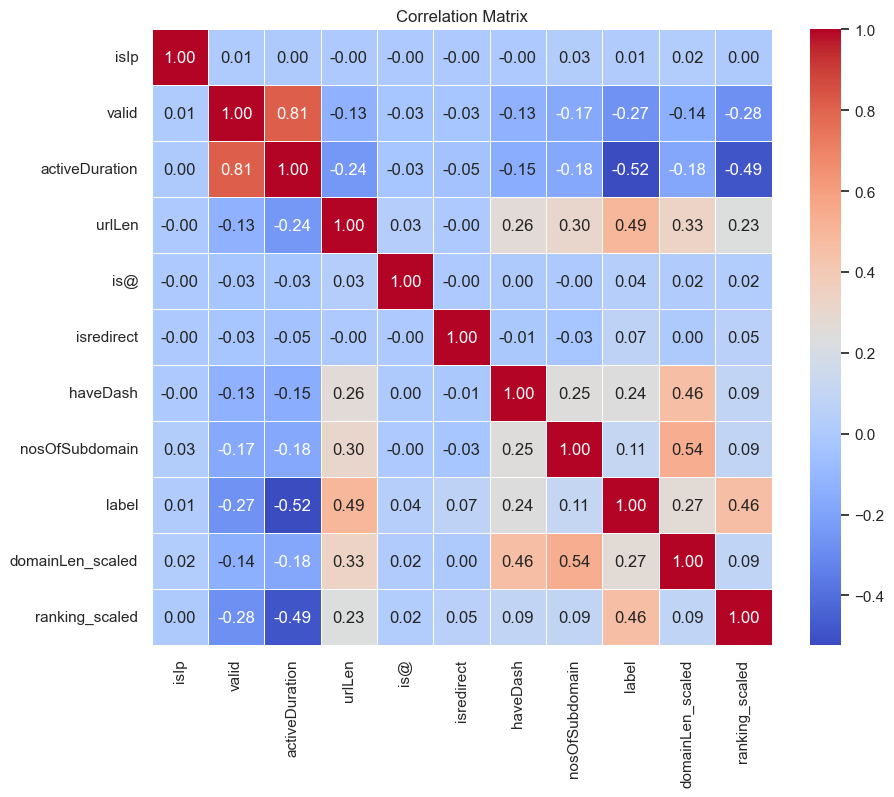

In [61]:
corr_matrix = ph.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [62]:
ph.to_csv('cleaned_ph.csv', index=False)
